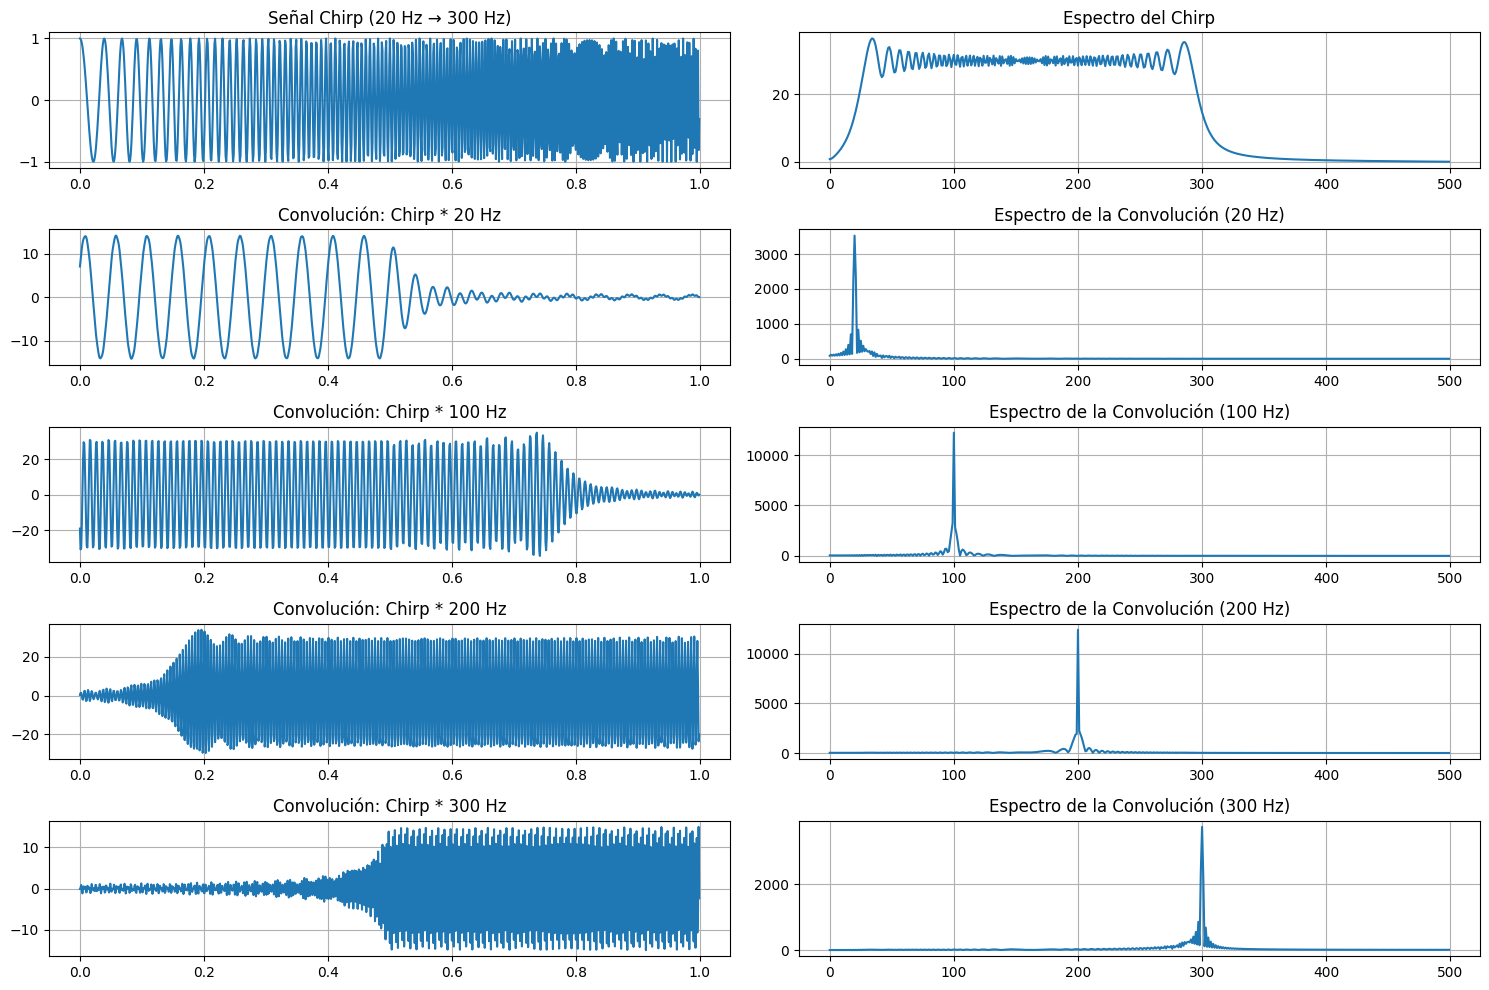

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve, chirp

# Parámetros
fs = 1000  # Frecuencia de muestreo (Hz)
T = 1      # Duración (s)
t = np.linspace(0, T, int(T * fs), endpoint=False)

# 1. Señal chirp (de 20 a 300 Hz)
chirp_signal = chirp(t, f0=20, f1=300, t1=T, method='linear')

# 2. Otras sinusoidales
frecuencias = [20, 100, 200, 300]
otras_sinusoidales = [np.sin(2 * np.pi * f * t) for f in frecuencias]

# 3. Convoluciones
convs = [convolve(chirp_signal, s, mode='same') for s in otras_sinusoidales]

# 4. FFT helper
def calc_fft(signal, fs):
    N = len(signal)
    fft_vals = np.fft.fft(signal)
    fft_freqs = np.fft.fftfreq(N, 1/fs)
    return fft_freqs[:N // 2], np.abs(fft_vals[:N // 2])  # Solo parte positiva

# 5. Plot señal + convoluciones
plt.figure(figsize=(15, 10))
plt.subplot(5, 2, 1)
plt.plot(t, chirp_signal)
plt.title('Señal Chirp (20 Hz → 300 Hz)')
plt.grid(True)

freqs, fft_chirp = calc_fft(chirp_signal, fs)
plt.subplot(5, 2, 2)
plt.plot(freqs, fft_chirp)
plt.title('Espectro del Chirp')
plt.grid(True)

for i, conv in enumerate(convs):
    plt.subplot(5, 2, 2*i + 3)
    plt.plot(t, conv)
    plt.title(f'Convolución: Chirp * {frecuencias[i]} Hz')
    plt.grid(True)

    freqs, fft_conv = calc_fft(conv, fs)
    plt.subplot(5, 2, 2*i + 4)
    plt.plot(freqs, fft_conv)
    plt.title(f'Espectro de la Convolución ({frecuencias[i]} Hz)')
    plt.grid(True)

plt.tight_layout()
plt.show()
